In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr

from boutdata.restart import addvar
import glob
import shutil

import scipy

sys.path.append(r"/ssd_scratch/scripts/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

In [2]:
casestore = dict()

In [3]:
db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

toload = [
    dict(name="base", id="xfla5-afn_chained", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),  
    dict(name="new", id="xfla5b-separate_limiters", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),  
    dict(name="limitcond", id="xfla5c-limit_conduction", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True), 
    dict(name="limitmom", id="xfla5d-also_limit_mom", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True), 

]


for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],
                                            unnormalise_geom = case["unnormalise_geom"])


CHECK: Total domain volume is 1.607E+00 [m3]
CHECK: Total domain volume is 1.607E+00 [m3]
CHECK: Total domain volume is 1.607E+00 [m3]
CHECK: Total domain volume is 1.607E+00 [m3]


In [4]:
for name in casestore:
    ds = casestore[name].ds
    ds = calculate_radial_fluxes(ds)
    ds = reverse_pfr_fluxes(ds)

## Baseline (chained)

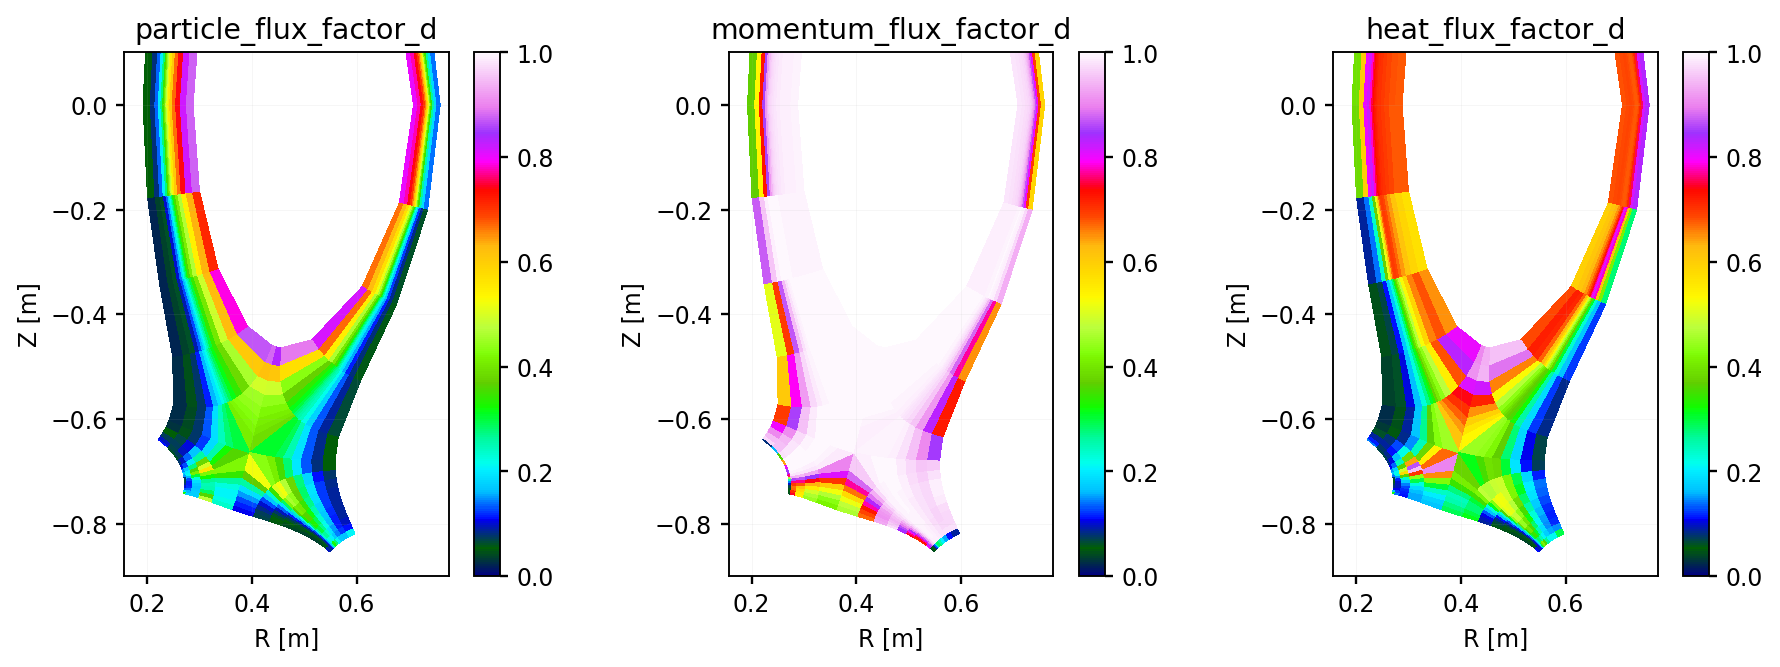

In [5]:
ds = casestore["base"].ds
if "t" in ds.dims.keys(): ds = ds.isel(t=-1)

fig, axes = plt.subplots(1,3, figsize=(13,4), dpi = 170)
ds["particle_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["momentum_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "gist_ncar", vmin = 0, vmax = 1)
# ds["conductive_heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[3], cmap = "gist_ncar", vmin = 0, vmax = 1)

for ax in axes:
    ax.set_ylim(-0.9,0.1)

## Chained, separate limiters

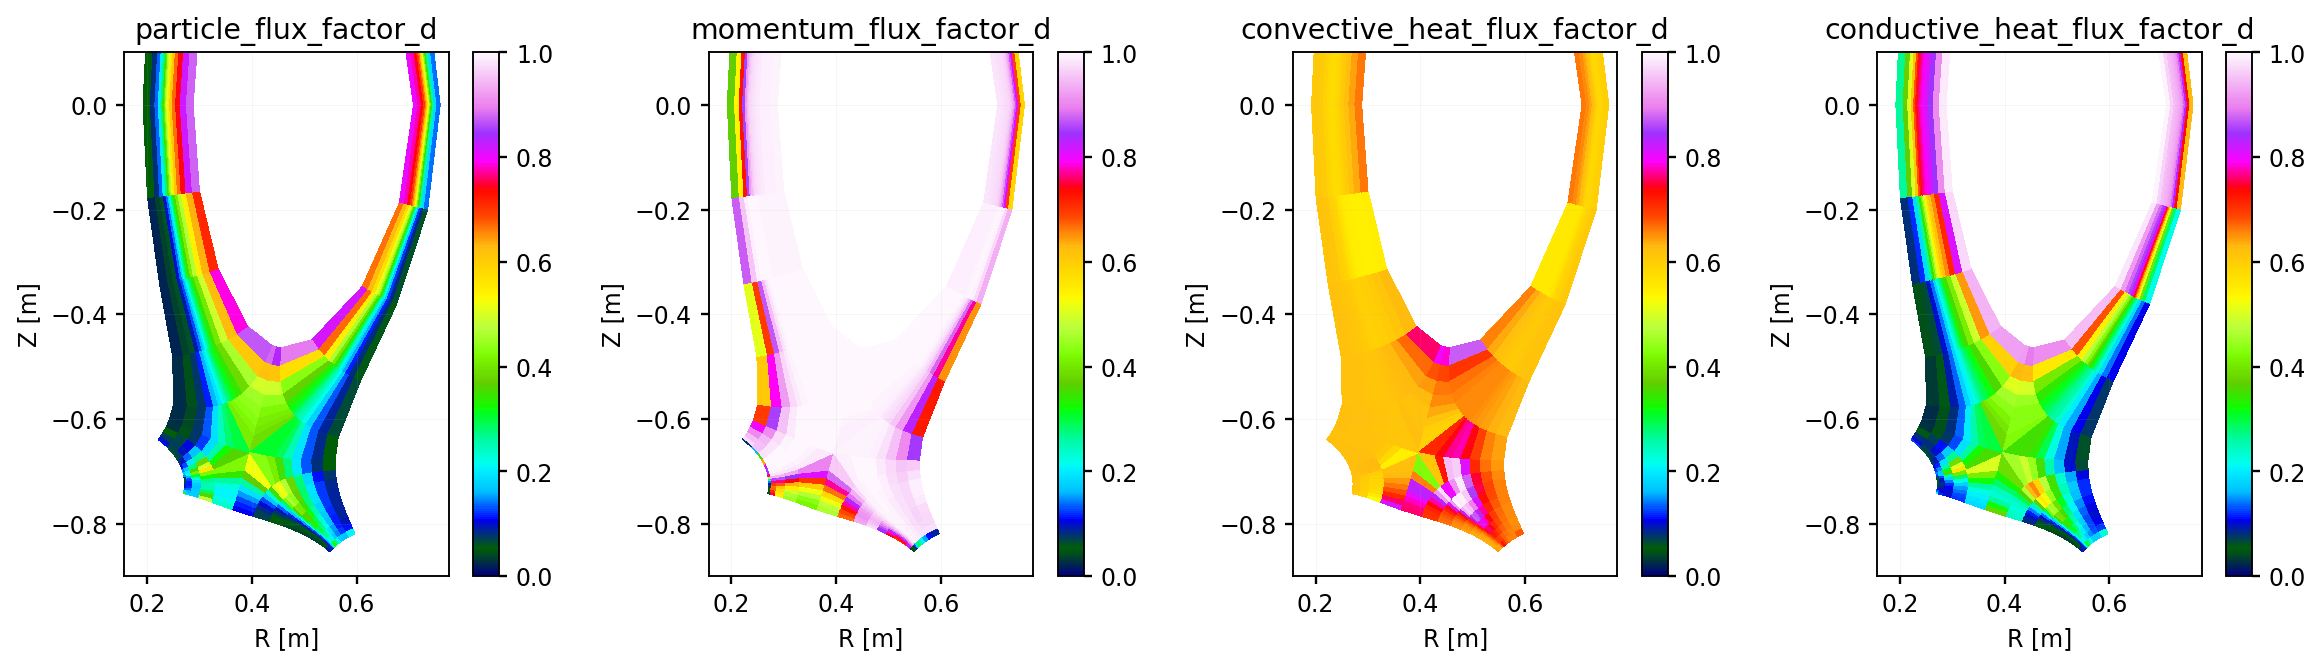

In [6]:
ds = casestore["new"].ds
if "t" in ds.dims.keys(): ds = ds.isel(t=-1)

fig, axes = plt.subplots(1,4, figsize=(17,4), dpi = 170)
ds["particle_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["momentum_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["convective_heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["conductive_heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[3], cmap = "gist_ncar", vmin = 0, vmax = 1)

for ax in axes:
    ax.set_ylim(-0.9,0.1)

## Chained, separate limiters, limit conduction

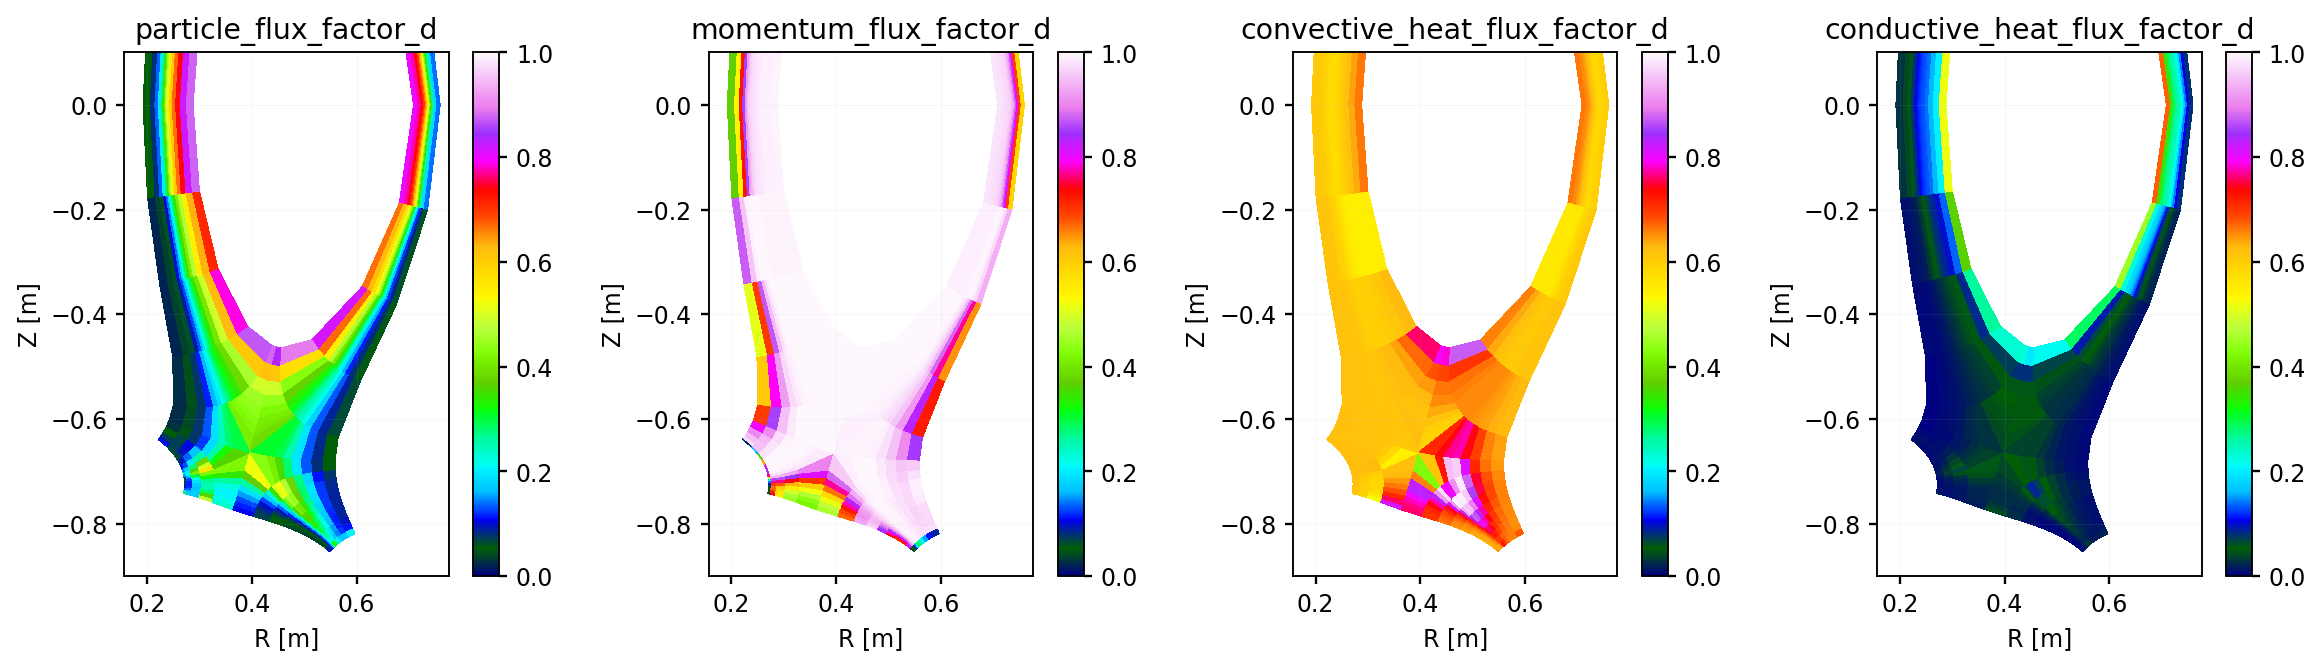

In [5]:
ds = casestore["limitcond"].ds
if "t" in ds.dims.keys(): ds = ds.isel(t=-1)

fig, axes = plt.subplots(1,4, figsize=(17,4), dpi = 170)
ds["particle_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["momentum_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["convective_heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["conductive_heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[3], cmap = "gist_ncar", vmin = 0, vmax = 1)

for ax in axes:
    ax.set_ylim(-0.9,0.1)

## Chained, separate limiters, limit conduction and momentum

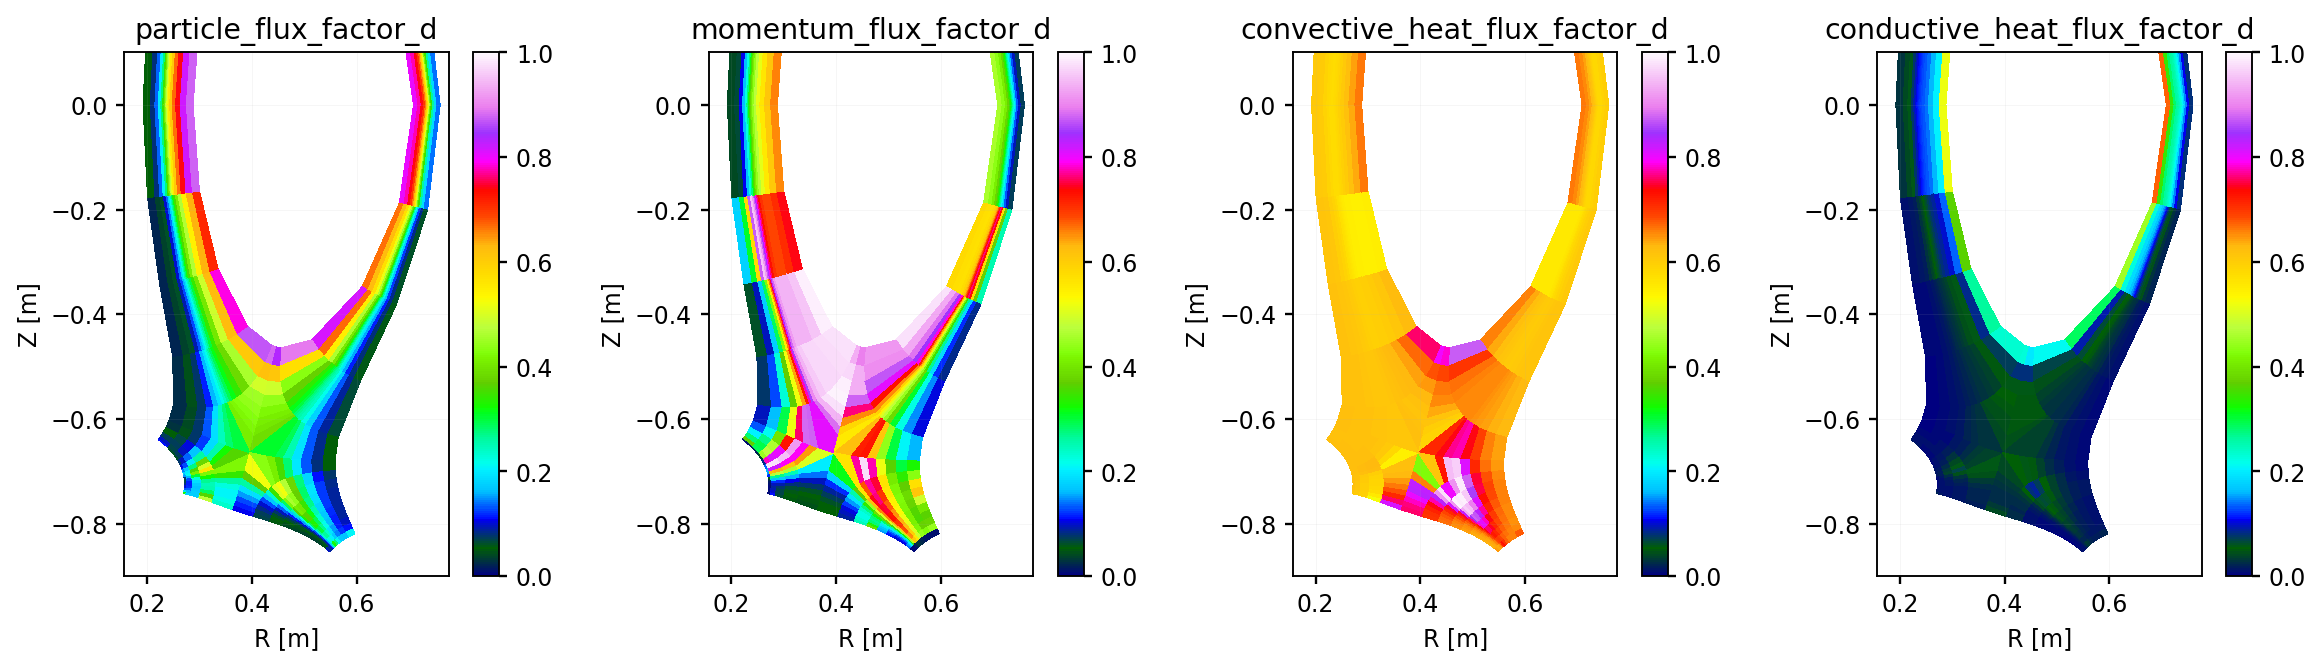

In [6]:
ds = casestore["limitmom"].ds
if "t" in ds.dims.keys(): ds = ds.isel(t=-1)

fig, axes = plt.subplots(1,4, figsize=(17,4), dpi = 170)
ds["particle_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["momentum_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["convective_heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "gist_ncar", vmin = 0, vmax = 1)
ds["conductive_heat_flux_factor_d"].hermesm.clean_guards().bout.polygon(ax = axes[3], cmap = "gist_ncar", vmin = 0, vmax = 1)

for ax in axes:
    ax.set_ylim(-0.9,0.1)

In [ ]:
casestore["new"].ds.data_vars

base
Integrating poloidally
new
Integrating poloidally
limitcond
Integrating poloidally


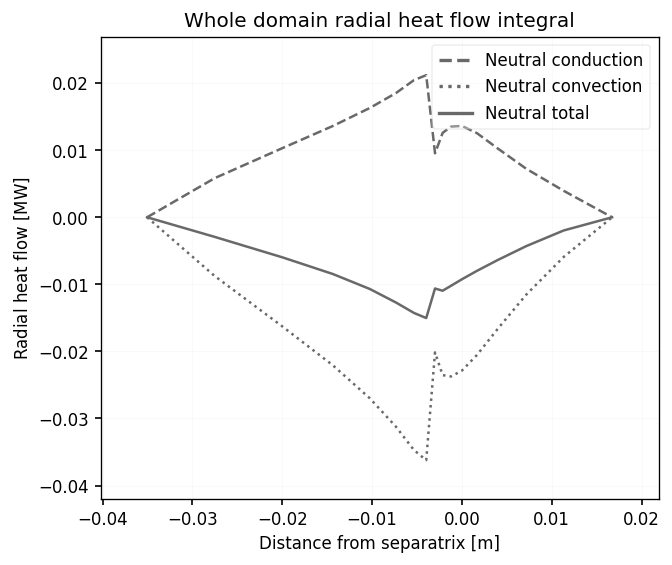

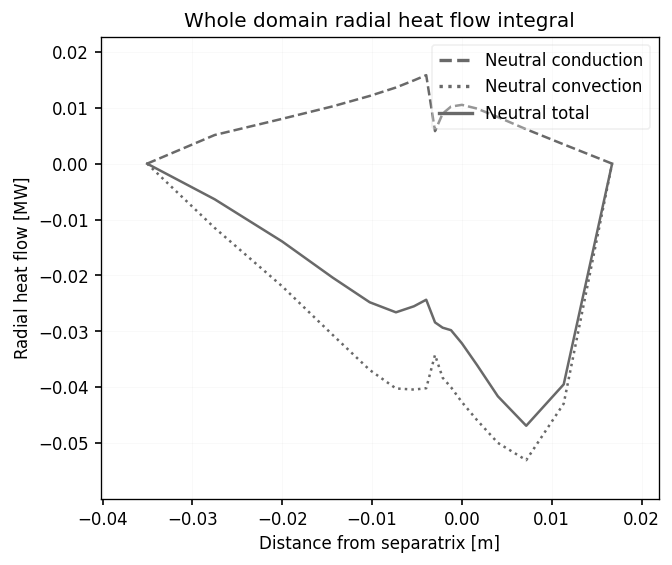

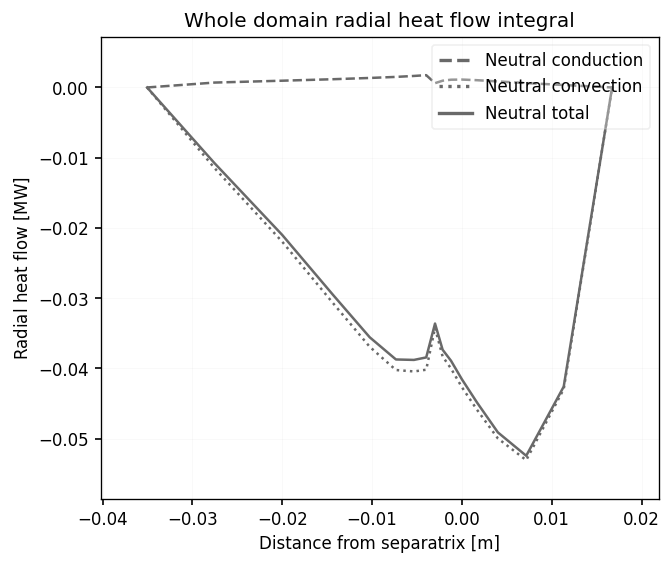

In [7]:
# ds = casestore["base"].ds
for name in casestore:
    print(name)
    plot_perp_heat_fluxes(casestore[name].ds, neutrals_only = True, loc = "integral")